# Análisis exploratorio de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_theme()


In [2]:
df = pd.read_csv("dataset_vuelos.csv")

## Pregunta #1: ¿En qué horarios se concentran los mayores retrasos de salida, y depende del día?

In [3]:
df['scheduled_hour'] = df['CRSDepTime'] // 100 

In [4]:
delay_by_hour_day = df.groupby(['scheduled_hour', 'DayOfWeek'])['is_delay'].mean().reset_index()


In [5]:
pivot_delay = delay_by_hour_day.pivot(index='scheduled_hour', columns='DayOfWeek', values='is_delay')

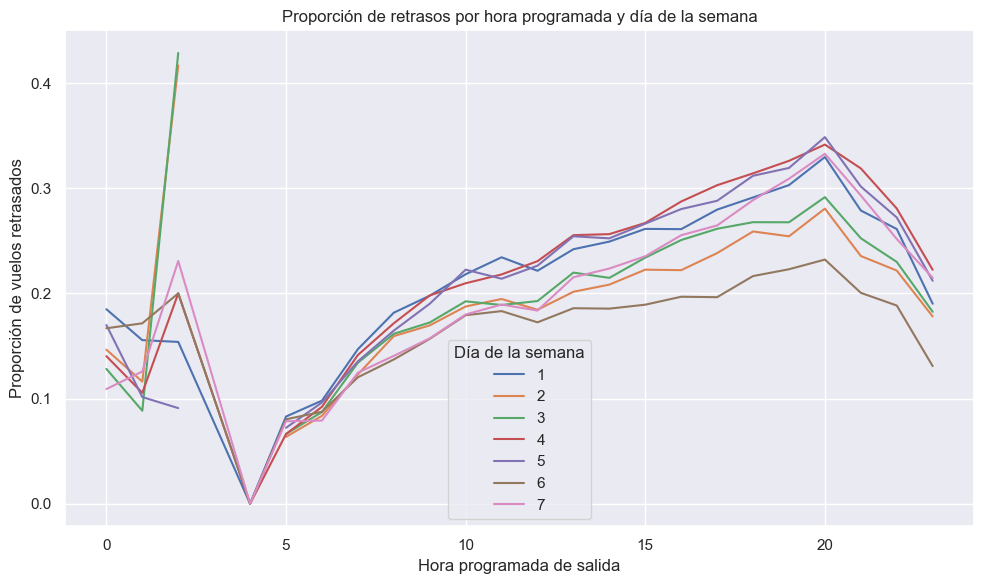

In [6]:
pivot_delay.plot(figsize=(10,6))
plt.title('Proporción de retrasos por hora programada y día de la semana')
plt.xlabel('Hora programada de salida')
plt.ylabel('Proporción de vuelos retrasados')
plt.legend(title='Día de la semana')
plt.tight_layout()
plt.show()

### Conclusión (Pregunta #1): 
#### Se puede observar que los vuelos con más retrasos tienden a salir entre las 15:00 y 20:00 horas, sin importar el día. También se nota que en las primeras horas del día (especialmente entre las 4:00 y 6:00) hay muy pocos retrasos. Esto puede ser porque los vuelos de la mañana salen más puntuales, ya que no dependen de los retrasos de otros vuelos anteriores.

## Pregunta #2: ¿Qué aerolíneas tienen mayor proporción de vuelos retrasados? 

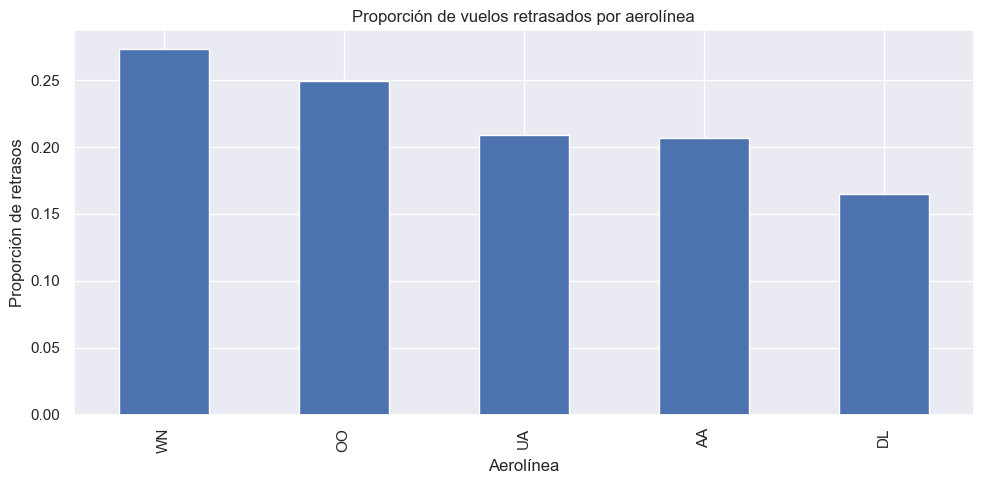

In [7]:

delay_by_airline = df.groupby('Reporting_Airline')['is_delay'].mean().sort_values(ascending=False)

# Visualizar
delay_by_airline.plot(kind='bar', figsize=(10,5))
plt.title('Proporción de vuelos retrasados por aerolínea')
plt.ylabel('Proporción de retrasos')
plt.xlabel('Aerolínea')
plt.tight_layout()
plt.show()

### Conclusión (Pregunta #2): 
#### La aerolínea con más retrasos fue Southwest Airlines, seguida por SkyWest Airlines. Ambas tienen una proporción de retrasos claramente más alta que las demás. Por otro lado, Delta Air Lines fue la más puntual. Esto muestra que hay diferencias importantes entre aerolíneas en cuanto a puntualidad, lo cual puede influir en la experiencia del pasajero.

## Pregunta #3: ¿Qué rutas presentan mayor frecuencia de retrasos?

In [8]:
df['route'] = df['Origin'] + '-' + df['Dest']


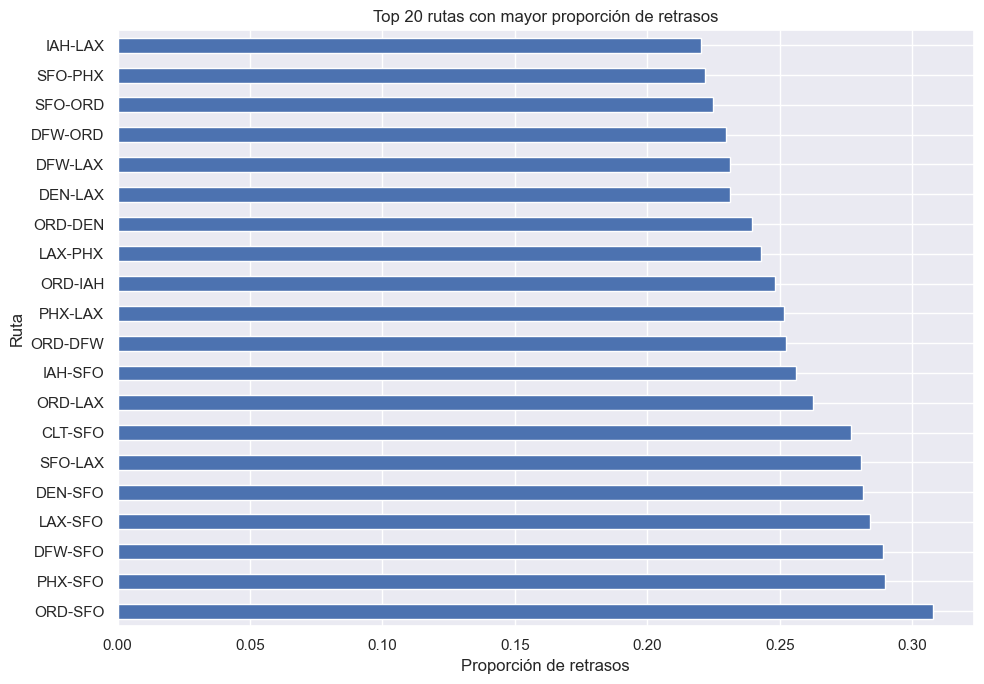

In [9]:
delay_by_route = df.groupby('route')['is_delay'].mean().sort_values(ascending=False).head(20)

# Visualizar
delay_by_route.plot(kind='barh', figsize=(10,7))
plt.title('Top 20 rutas con mayor proporción de retrasos')
plt.xlabel('Proporción de retrasos')
plt.ylabel('Ruta')
plt.tight_layout()
plt.show()

### Conclusión (Pregunta #3):
#### Las rutas con más retrasos fueron principalmente entre ciudades grandes como Chicago (ORD), San Francisco (SFO), Phoenix (PHX), Los Ángeles (LAX), Dallas (DFW) y Houston (IAH). La ruta con más retrasos fue de Chicago a San Francisco, seguida por Phoenix a San Francisco y Dallas a San Francisco. Esto sugiere que los vuelos entre aeropuertos muy transitados o con condiciones climáticas variables suelen tener más demoras.